In [1]:
#Import libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Data
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Checking for missing values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

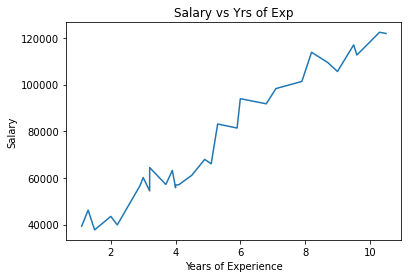

In [6]:
plt.plot(df.YearsExperience, df.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Yrs of Exp')
plt.show()

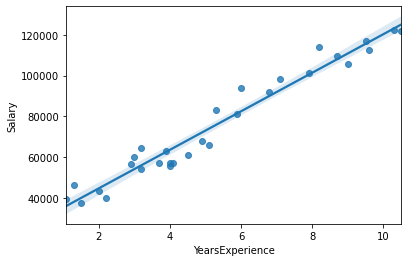

In [7]:
sns.regplot(data = df, x= 'YearsExperience', y='Salary')

plt.show()

In [8]:
# splitting data into X and Y variables
X = df.YearsExperience
y = df.Salary

In [9]:
#splitting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 150)

In [10]:
#importing linear regression model

import statsmodels.api as sm

In [11]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [12]:
lr.params

const              24928.124602
YearsExperience     9517.586028
dtype: float64

In [13]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     422.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.44e-16
Time:                        18:16:34   Log-Likelihood:                -242.63
No. Observations:                  24   AIC:                             489.3
Df Residuals:                      22   BIC:                             491.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.493e+04   2975.820     

In [14]:
y_train_pred = lr.predict(X_train_sm)

In [15]:
res = (y_train - y_train_pred)

res

17     7716.669448
24     1699.876952
20     2090.290406
15    -3626.296141
11    -7204.468715
23    10839.669966
28     -568.260693
13    -6869.227318
1      8904.013561
12    -6041.468715
22     1184.945774
19    11906.359228
3      -438.296659
8      9060.600107
9     -2954.192907
5      4112.875916
14    -6646.261729
29    -2990.777899
18      281.117831
16    -7438.813346
25    -5004.398857
27    -3661.950474
26     1623.808129
4     -5975.813864
dtype: float64

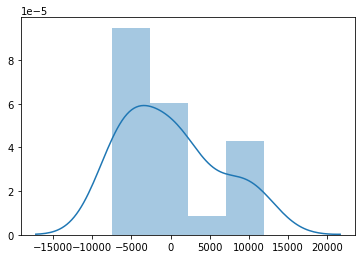

In [16]:
#Distribution plot of Residuals

sns.distplot(res)
plt.show()

#### Looking for patterns in the residuals

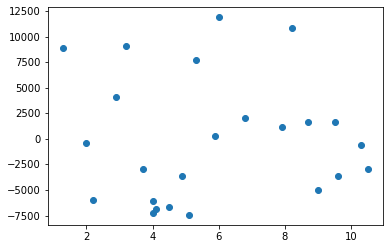

In [17]:
plt.scatter(X_train, res)

## Precitions on Test Data Set

In [18]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [19]:
y_pred.head()

6     53480.882687
10    62046.710112
0     35397.469233
2     39204.503645
21    92502.985403
dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# checking mean squared error value

np.sqrt(mean_squared_error(y_test, y_pred))

4036.562323824326

In [22]:
# Checking R^2 value
r_squared = r2_score(y_test, y_pred)
r_squared

0.9596167623070663

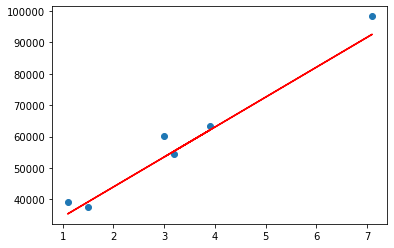

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_pred,color = 'red')
plt.show()

## We can use the above model parameters for predicting the salary based on years of experience

In [24]:
def predicting(x):
    a = lr.params[0]
    b = lr.params[1]
    form = round(a+b*x,2)
    print('Predicted Salary for {} years of experience is {}'.format(x,form))

In [25]:
predicting(4)

Predicted Salary for 4 years of experience is 62998.47


In [26]:
predicting(2.2)

Predicted Salary for 2.2 years of experience is 45866.81
